# Convolutional Neural Networks

## Preliminaries

In this practical session you will implement and train several Convolutional Neural Networks (CNNs) using the Keras framework with a Tensorflow backend. If you are not already familiar with Keras, you can go over the [following tutorial](https://github.com/tueimage/essential-skills/blob/master/keras.md). More detailed information on the different functionalities can be found in the [Keras library documentation](https://keras.io/). 

Note that for this set of exercise CPU-only Tensorflow, which you should already have installed, is sufficient (i.e. GPU-support is not required but it will make your experiments run faster). 

You are also required to use the `gryds` package for data augmentation that you can install directly from git: `pip install git+https://github.com/tueimage/gryds/`.

You also have to install the Keras deep learning framework (if you have not done so already) by running `conda install keras`. Note that there are two implementations of Keras, one from https://keras.io/ and another one that ships with Tensorflow. Here we use the former. 

## MNIST
We will first train a simple CNN to classify handwritten digits using the MNIST dataset. This dataset is often referred to as the "Hello world!" example of deep learning because it can be used to quickly illustrate a small neural network in action (and obtain a decent classification accuracy in the process). More information on it can be found [here](http://yann.lecun.com/exdb/mnist/).

First, let's load the dataset and visualize some images.

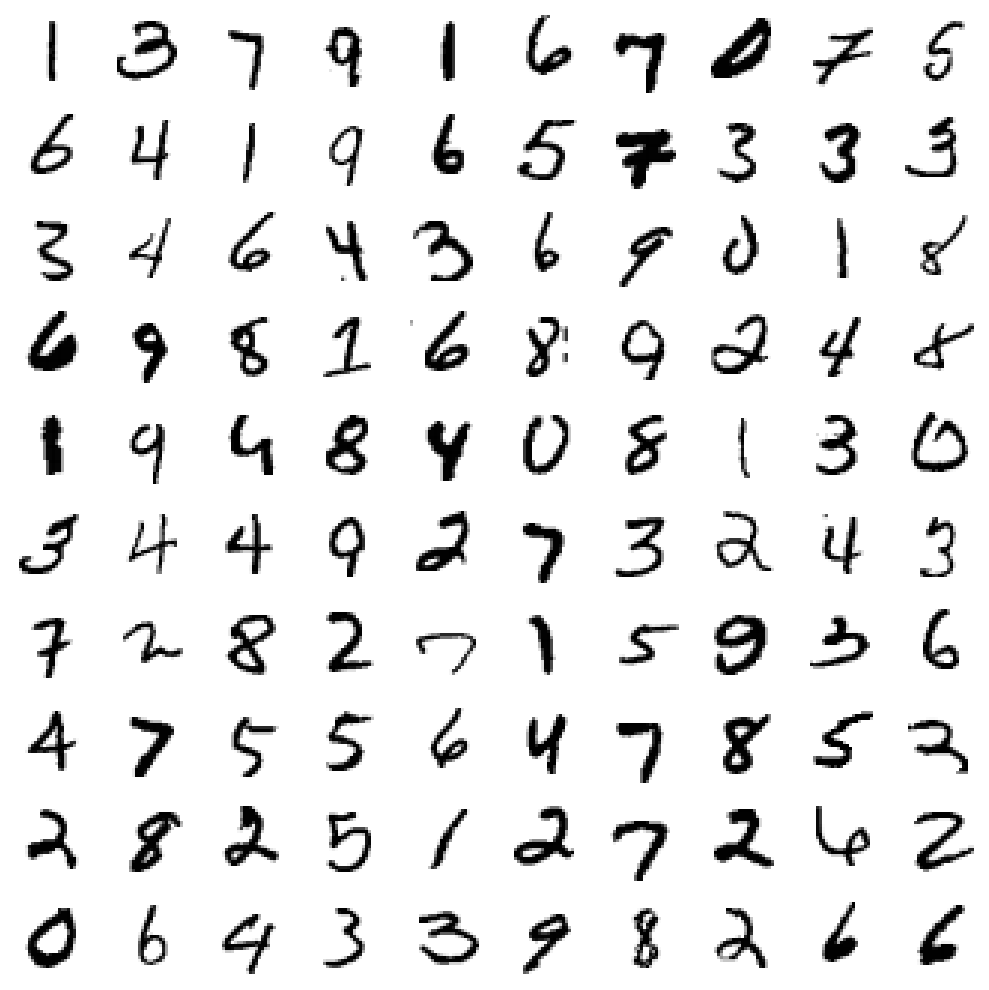

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

# load the MNIST the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale the image intensities to the 0-1 range
x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

# convert the data to channel-last
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# convert the labels to one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

def plot_images(images, dim=(10, 10), figsize=(10, 10), title=''):
    
    plt.figure(figsize=figsize)
    
    for i in range(images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
    
plot_images(x_train[np.random.randint(0, x_train.shape[0], size=100)].reshape(100, 28, 28))

The MNIST classification task is quite simple: given an image, predict the digit that it contains. Thus, this is a 10-class classification problem.

Let's define a simple network for the handwritten digit classification.

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Compile and train the network (note that this could take a while).

In [7]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 80s 169ms/step - loss: 0.2402 - accuracy: 0.9263 - val_loss: 0.0521 - val_accuracy: 0.9819
Epoch 2/12
469/469 [==============================] - 61s 131ms/step - loss: 0.0836 - accuracy: 0.9751 - val_loss: 0.0395 - val_accuracy: 0.9876
Epoch 3/12
469/469 [==============================] - 63s 134ms/step - loss: 0.0631 - accuracy: 0.9809 - val_loss: 0.0314 - val_accuracy: 0.9894
Epoch 4/12
469/469 [==============================] - 83s 177ms/step - loss: 0.0516 - accuracy: 0.9842 - val_loss: 0.0293 - val_accuracy: 0.9904
Epoch 5/12
469/469 [==============================] - 129s 275ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0325 - val_accuracy: 0.9895
Epoch 6/12
469/469 [==============================] - 130s 278ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0312 - val_accuracy: 0.9903
Epoch 7/12
469/469 [==============================] - 142s 303ms/step - loss: 0.0358 - accuracy: 0.9886 - val_loss: 0.0290 - val

Now that the model is trained, we can evaluate its performance on the independent test dataset.

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02629667893052101
Test accuracy: 0.9926000237464905


## U-Net
The U-Net convolutional neural network architecture was first developed for biomedical image segmentation and is to this day one of the most widely used methods for image segmentation. The details of the architecture can be found in the [original paper](https://arxiv.org/abs/1505.04597). In this practical we will build and train a U-Net network that is able to segment blood vessels in retinal images. 

### Loading and visualizing the data
The data for this task is taken from the [DRIVE](https://www.isi.uu.nl/Research/Databases/DRIVE/index.php) database. It consists of photographs of the retina, where the goal is to segment the blood vessels within. The dataset has a total of 40 photographs, divided in 20 images for training and 20 for testing. The images corresponding to the DRIVE test set can be found [here](https://www.dropbox.com/s/zk51wgupimw7jd9/DRIVE.zip?dl=0).

Let's load the training set and visualize an image with the corresponding blood vessel segmentation. For training we will divide the data in a training and a validation set to monitor the model during training.

(20, 584, 565, 3)


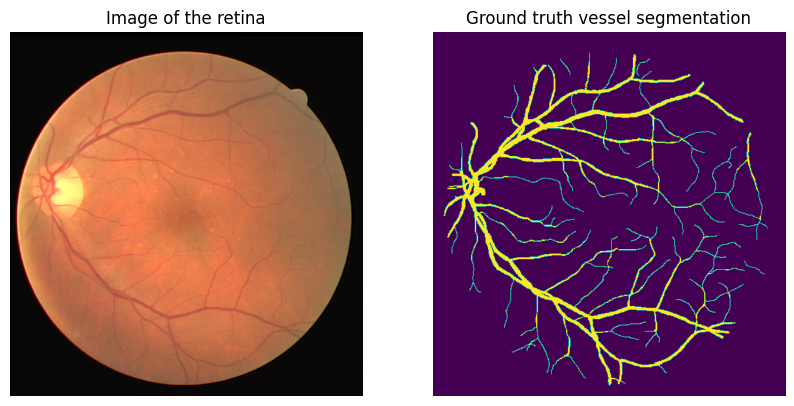

(16, 584, 565, 3)
(16, 584, 565, 1)
(16, 584, 565, 1)
(4, 584, 565, 3)
(4, 584, 565, 1)
(4, 584, 565, 1)


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob
from unet_utils import load_data

# location of the DRIVE dataset
data_folder = 'C:/Users/20202310/PycharmProjects/8DM50_Group_1/Week_4/DRIVE/'
train_paths = glob(data_folder + 'training/images/*.tif')
images, masks, segmentations = load_data(train_paths)

# print the shape of image dataset
print(images.shape)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(segmentations[0][:, :, 0])

plt.show()

# divide in training and validation
train_images, val_images, train_masks, val_masks, train_segmentations, val_segmentations = train_test_split(
    images, masks, segmentations, test_size=0.2, random_state=7)

# print the shape of the training and valudation datasets
print(train_images.shape)
print(train_masks.shape)
print(train_segmentations.shape)
print(val_images.shape)
print(val_masks.shape)
print(val_segmentations.shape)

### Training a U-Net model

You are already provided with implementation of the U-Net architecture in `unet_model.py`. This is a modular implementation and can be used to generate U-Net architectures with a variety of hyperparameters such as depth and number of feature maps. Before using the model, examine the code and documentation and make sure that you understand all the details.

We will train a U-Net model using smaller patches extracted from the training images. Training the images on smaller patches requires less computation power and results in a more varied training dataset (it has the effect of data augmentation by image translation). Because a U-Net is a fully convolutional network it can be evaluated on inputs of different size (the output size will change according to the input size). Thus, although the model will be trained on smaller patches it can still be used to segment larger images with one pass through the model. 


(16, 32, 32, 3)


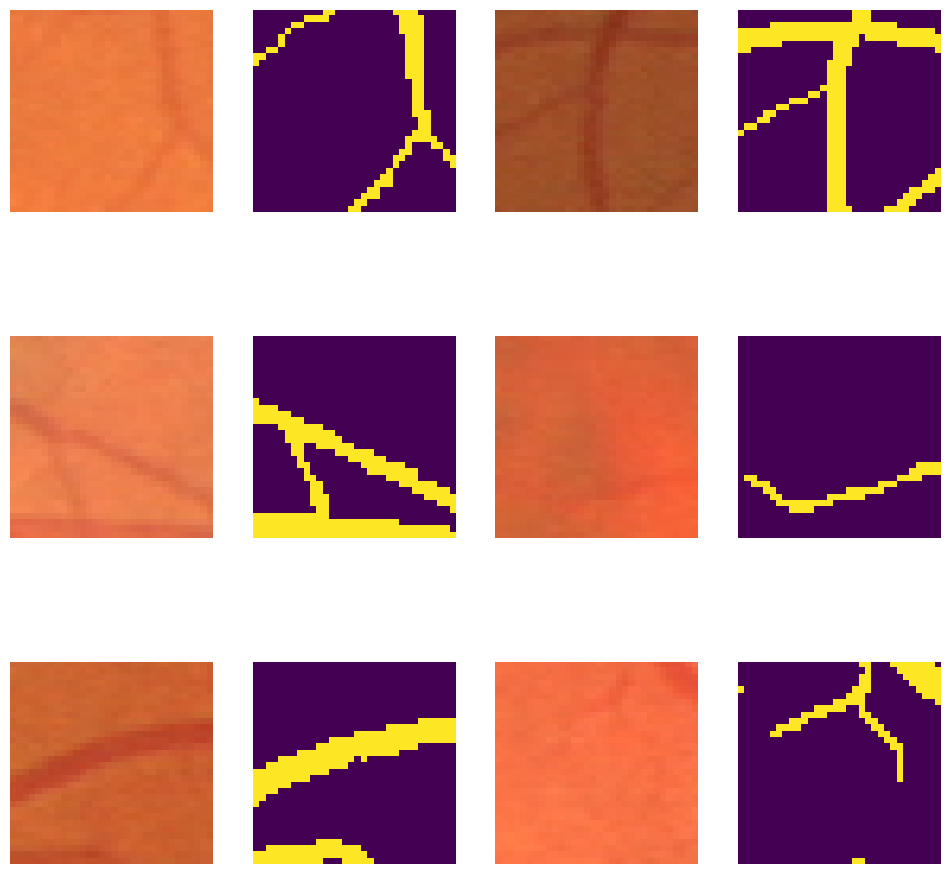

In [5]:
from unet_utils import extract_patches, preprocessing
# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# visualize a couple of patches as a visual check
patches, patches_segmentations = extract_patches(train_images, train_segmentations, patch_size, patches_per_im=1, seed=7)

print(patches.shape)
    
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

for i in range(0, 3):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(patches[i])
    axes[i, 1].axis('off')
    axes[i, 1].imshow(patches_segmentations[i][:, :, 0])
    axes[i, 2].axis('off')
    axes[i, 2].imshow(patches[i+5])
    axes[i, 3].axis('off')
    axes[i, 3].imshow(patches_segmentations[i+5][:, :, 0])

plt.show()

In [6]:
# pad the validation data to fit the U-Net model
# images of shape (584, 565) shape result in concatenation error due to the odd number of columns

print("Old shape:", val_images.shape)

val_images, val_masks, val_segmentations = preprocessing(
    val_images, 
    val_masks, 
    val_segmentations, 
    desired_shape=(584, 584))
    
print("New shape:", val_images.shape)

Old shape: (4, 584, 565, 3)
New shape: (4, 584, 584, 3)


In [7]:
import os
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)
print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 30
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
#history = model.fit(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
#                             validation_data=(val_images, val_segmentations),
#                             steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
#                             callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)


In [22]:
# Save training history to a CSV file
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history_normal.csv', index=False)

### Visualizing the segmentation results

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


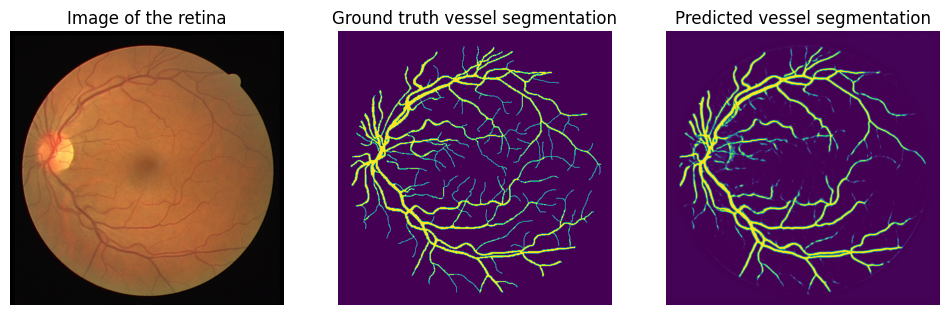

In [23]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

# Exercises

## Number of parameters

The first convolutional layer in the MNIST example has 320 parameters. The first fully connected layer has 1179,776 parameters. What do these parameters correspond to? 

<font color='#3CB371'>When discussing neural networks, the word parameters is used to describe all the weights and biases that a model learns during training. The first convolutional layer having 320 parameters means that the model has a total of 320 weights and biases inside of that layer. Generally every filter with size $n \times n$ will have $n^2$ weights plus one bias, acounting for $n^2 + 1$ parameters. In the example the 320 comes from 32 filters with a $3 \times 3$ kernel, resulting in $32 \times (3^2 + 1) = 320$ parameters

<font color='#3CB371'>A fully connected layer has weights connecting every neuron in the previous layer to every neuron in the current layer. In this case the amount of parameters is dependent on the amount of neurons in the previous and current layer. A previous layer with m neurons and a current layer with n neurons will result in $m \times n$ weights. In addition, every neuron in the current layer will be accompanied by a bias value. This results in a fully connected layer having $m \times n + n$ parameters
(i do not know where to find this exactly in the example)


<font color='#770a0a'>What is the general expression for the number of parameters of 1) a convolutional layer and 2) a fully-connected layer?</font>



### <font color='#3CB371'> General expression of number of parameters of a convolutional layer:

The expression, earlier described in the previous question is equal to the filter height $k_{y}$ multiplied with the filter width $k_{x}$ multiplied with the amount of input channels in the image $n_{in}$ (eg. grayscale is 1, RGB is 3). This is then multiplied with the amount of filters used $n_{filters}$. Lastly a bias for every filter used is added. This leads to the final expression:
$$
n_{parameters} = (k_{x} \times k_{y} \times n_{in}) \times n_{filters} + n_{filters}
$$


### <font color='#3CB371'> General expression of number of parameters of a fully connected layer:
This expression was also earlier described in the previous question: The amount of parameters is equal to the amount of neurons present in the input layer, $n_{input}$, multiplied with the amount of neurons in the output layer, $n_{output}$, plus a bias parameter for every output layer. This leads to the final expression:
$$
n_{parameters} = (n_{input} \times n_{output}) + n_{output}
$$


## Fully-convolutional MNIST model

Modify the model in the MNIST example in such a way that it only contains convolutional layers while keeping the same number of parameters. If you do the modification correctly, the two models will have the same behaviour (i.e. they will represent the same model, only with different implementation). Show this experimentally. 


To create a model that has equal functionality but only consists of convolutional layers, while keeping the same amount of parameters, we simply exchange both dense layers with convolutional layers that contain a kernel of 1x1. We implement this as follows:

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model_conv = Sequential()
model_conv.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_conv.add(Dropout(0.25))

# First Dense layer (128 units) replaced with Conv2D 1x1 filters
model_conv.add(Conv2D(128, (1, 1), activation='relu'))
model_conv.add(Dropout(0.5))

# Final Dense layer (10 units) replaced with Conv2D 1x1 filters
model_conv.add(Conv2D(10, (1, 1), activation='softmax'))

model_conv.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 12, 12, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 12, 12, 10)     │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,426 (111.04 KB)

 Trainable params: 28,426 (111.04 KB)

 Non-trainable params: 0 (0.00 B)

Dit zou zo gewoon moeten werken. Toch zegt hij dat mijn 128 filter, 1x1 kernel maar 8.320 parameters heeft???? Ik zou niet weten hoe ik dit moet fixen.


## U-Net architecture

<font color='#770a0a'> What is the role of the skip connections in the U-Net neural network architecture? Will it be possible to train the exact same architecture with the skip connections omitted? If yes, what would be the expected result? If no, what would be the cause of the error?</font>

<font color='#3CB371'>A U-Net consists of a number of downsampling layers followed by a number of upsampling layers. You can imagine that every downsampling layer is accompanied by a certain loss of information. In images this lost information often consists of the high frequency data, or detailed structures. This loss of information can negatively affect the performance of the model. To counteract this, most U-nets use skip connections as a means to propagate information from the downsampling layers to the deeper, upsampling, layers. This ensures that the detailed structures within images are preservered throughout the model.

<font color='#3CB371'>With this reasoning, the skip connections can definetely be omitted from the model without losing its basic functionality. However, doing so would significantly affect the models ability to account for detailed or small structures within images.


## Data augmentation

<font color='#770a0a'>Why does data augmentation result in less overfitting? Can data augmentation be applied to the test samples? If yes, towards what goal? If no, what is preventing that?</font>

<font color='#3CB371'>Through altering the samples used in training, data augmentation introduces more variety and volume tow the training dataset. This increased variety and volume make it harder for the model to effectively adjust to all the discrepancies within the dataset, thereby reducing the chance of overfitting.

<font color='#3CB371'>Data augmentation is generally not applied to test samples. This is because of a few reasons. The biggest reason being the loss of the ground truth (or golden standard in medical image analysis) and the thereby introduced bias. For example, flipping an MR image inside the test set 180 degrees might result in an image that is not anatomically correct anymore. The performance metrics retrieved from the tests where these images are used might therefore not accurately represent its performance in the real world, where these anatomically incorrect images will never be encountered. This introduces significant bias in the evaluation of the model performance. Because of this data augmentation is generally not used in test samples.





Implement random brightness augmentation of the image data by adding a random offset to the image intensity before passing them trough the network at training time. Train a model with random brightness augmentation and compare it to the baseline above. 

In [26]:
import random
# Custom brightness augmentation function
def random_brightness(image,label):
    brightness_factor = random.uniform(0.8, 1.2)
    return np.clip(image * brightness_factor, 0, 1), label

In [27]:
def augmented_datagenerator(images, segmentations, patch_size, patches_per_im, batch_size):
    """
    Simple data-generator to feed patches in batches to the network.
    To extract different patches each epoch, steps_per_epoch in fit_generator should be equal to nr_batches.

    :param images: Input images
    :param segmentations: Corresponding segmentations
    :param patch_size: Desired patch size
    :param patches_per_im: Amount of patches to extract per image
    :param batch_size: Number of patches per batch
    :return: Batch of patches to feed to the model
    """
    # Total number of patches generated per epoch
    total_patches = len(images) * patches_per_im
    # Amount of batches in one epoch
    nr_batches = int(np.ceil(total_patches / batch_size))

    while True:
        # Each epoch extract different patches from the training images
        x, y = extract_patches(images, segmentations, patch_size, patches_per_im, seed=np.random.randint(0, 500))

        # Feed data in batches to the network
        for idx in range(nr_batches):
            x_batch = x[idx * batch_size:(idx + 1) * batch_size]
            y_batch = y[idx * batch_size:(idx + 1) * batch_size]

            # Apply data augmentation to each patch
            augmented_x_batch = []
            augmented_y_batch = []

            for img, label in zip(x_batch, y_batch):
                augmented_image, augmented_label = random_brightness(img, label)
                augmented_x_batch.append(augmented_image)
                augmented_y_batch.append(augmented_label)

            # Convert to numpy arrays
            augmented_x_batch = np.array(augmented_x_batch)
            augmented_y_batch = np.array(augmented_y_batch)

            yield augmented_x_batch, augmented_y_batch

In [30]:
history = model.fit(augmented_datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                    validation_data=(val_images, val_segmentations), 
                    steps_per_epoch=steps_per_epoch, 
                    epochs=10, 
                    callbacks=[early_stopping], 
                    verbose=2)

Epoch 1/10
50/50 - 23s - 450ms/step - accuracy: 0.9619 - loss: 0.1117 - val_accuracy: 0.5703 - val_loss: 1.2883
Epoch 2/10
50/50 - 21s - 414ms/step - accuracy: 0.9640 - loss: 0.1039 - val_accuracy: 0.6706 - val_loss: 1.0937
Epoch 3/10
50/50 - 21s - 412ms/step - accuracy: 0.9631 - loss: 0.1058 - val_accuracy: 0.9077 - val_loss: 0.2465
Epoch 4/10
50/50 - 21s - 425ms/step - accuracy: 0.9632 - loss: 0.1040 - val_accuracy: 0.9459 - val_loss: 0.1469
Epoch 5/10
50/50 - 20s - 402ms/step - accuracy: 0.9642 - loss: 0.1008 - val_accuracy: 0.7144 - val_loss: 0.6759
Epoch 6/10
50/50 - 22s - 437ms/step - accuracy: 0.9645 - loss: 0.0984 - val_accuracy: 0.8944 - val_loss: 0.2748
Epoch 7/10
50/50 - 25s - 508ms/step - accuracy: 0.9662 - loss: 0.0947 - val_accuracy: 0.8559 - val_loss: 0.3402
Epoch 8/10
50/50 - 23s - 462ms/step - accuracy: 0.9652 - loss: 0.0956 - val_accuracy: 0.9495 - val_loss: 0.1426
Epoch 9/10
50/50 - 21s - 426ms/step - accuracy: 0.9657 - loss: 0.0948 - val_accuracy: 0.5770 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


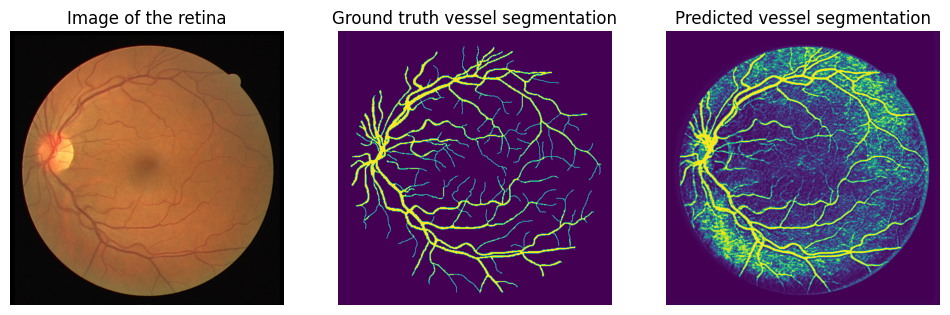

In [31]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

mplement data augmentation procedure that in addition to brightness augmentation also performs b-spline geometric augmentation using the [`gryds`](https://github.com/tueimage/gryds) package (you can look at the documentation of the package for an example on how to do that). Compare the new model with the baseline and the model that only performs brightness augmentation.



In [34]:
import gryds
# Custom B-spline geometric augmentation
def bspline_geometric_augmentation(image):
    channels = image.shape[-1]  # Get the number of channels
    grid = image.shape[:2]  # Shape of the image (height, width)

    # Define random B-spline coefficients
    bspline_coefficients = np.random.randn(2, 3, 3) * 2

    # Create the B-spline transformation
    bspline_transform = gryds.BSplineTransformation(bspline_coefficients)

    # Apply the transformation to each channel separately
    augmented_image = np.zeros_like(image)
    for channel in range(channels):
        image_interpolator = gryds.Interpolator(image[..., channel], order=1)
        augmented_image[..., channel] = image_interpolator.transform(bspline_transform)
    
    return augmented_image

In [35]:
def second_augmented_datagenerator(images, segmentations, patch_size, patches_per_im, batch_size):
    """
    Simple data-generator to feed patches in batches to the network.
    To extract different patches each epoch, steps_per_epoch in fit_generator should be equal to nr_batches.

    :param images: Input images
    :param segmentations: Corresponding segmentations
    :param patch_size: Desired patch size
    :param patches_per_im: Amount of patches to extract per image
    :param batch_size: Number of patches per batch
    :return: Batch of patches to feed to the model
    """
    # Total number of patches generated per epoch
    total_patches = len(images) * patches_per_im
    # Amount of batches in one epoch
    nr_batches = int(np.ceil(total_patches / batch_size))

    while True:
        # Each epoch extract different patches from the training images
        x, y = extract_patches(images, segmentations, patch_size, patches_per_im, seed=np.random.randint(0, 500))

        # Feed data in batches to the network
        for idx in range(nr_batches):
            x_batch = x[idx * batch_size:(idx + 1) * batch_size]
            y_batch = y[idx * batch_size:(idx + 1) * batch_size]

            # Apply data augmentation to each patch
            augmented_x_batch = []
            augmented_y_batch = []

            for img, label in zip(x_batch, y_batch):
                augmented_image, augmented_label = random_brightness(img, label)
                sec_augmented_image = bspline_geometric_augmentation(augmented_image)
                sec_augmented_label = bspline_geometric_augmentation(augmented_label)
                augmented_x_batch.append(sec_augmented_image)
                augmented_y_batch.append(sec_augmented_label)

            # Convert to numpy arrays
            augmented_x_batch = np.array(augmented_x_batch)
            augmented_y_batch = np.array(augmented_y_batch)

            yield augmented_x_batch, augmented_y_batch

In [36]:
history = model.fit(second_augmented_datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                    validation_data=(val_images, val_segmentations), 
                    steps_per_epoch=steps_per_epoch, 
                    epochs=10, 
                    callbacks=[early_stopping], 
                    verbose=2)

Epoch 1/10
50/50 - 25s - 502ms/step - accuracy: 0.9876 - loss: 0.0621 - val_accuracy: 0.7029 - val_loss: 0.5892
Epoch 2/10
50/50 - 23s - 468ms/step - accuracy: 0.9922 - loss: 0.0372 - val_accuracy: 0.9212 - val_loss: 0.3833
Epoch 3/10
50/50 - 23s - 457ms/step - accuracy: 0.9923 - loss: 0.0347 - val_accuracy: 0.9211 - val_loss: 0.5135
Epoch 4/10
50/50 - 24s - 473ms/step - accuracy: 0.9925 - loss: 0.0334 - val_accuracy: 0.9211 - val_loss: 0.5154
Epoch 5/10
50/50 - 23s - 470ms/step - accuracy: 0.9925 - loss: 0.0334 - val_accuracy: 0.9211 - val_loss: 0.5273
Epoch 6/10
50/50 - 24s - 484ms/step - accuracy: 0.9928 - loss: 0.0316 - val_accuracy: 0.9211 - val_loss: 0.5921
Epoch 7/10
50/50 - 24s - 477ms/step - accuracy: 0.9926 - loss: 0.0319 - val_accuracy: 0.9211 - val_loss: 0.5736
Epoch 8/10
50/50 - 25s - 491ms/step - accuracy: 0.9925 - loss: 0.0327 - val_accuracy: 0.9211 - val_loss: 0.7367
Epoch 9/10
50/50 - 25s - 498ms/step - accuracy: 0.9924 - loss: 0.0329 - val_accuracy: 0.9211 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


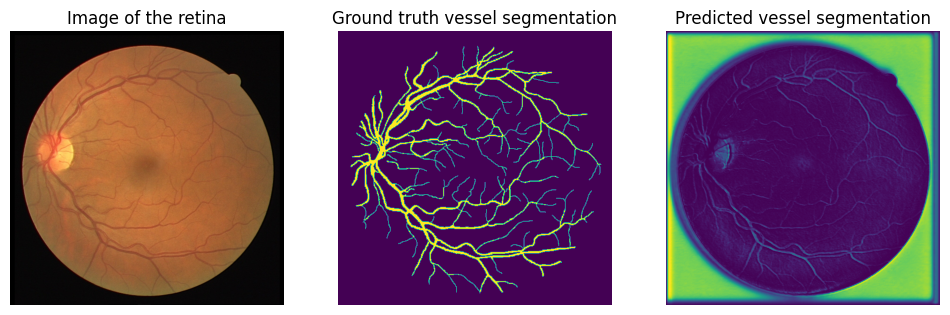

In [37]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()